In [29]:
#get data from web

import urllib
import datetime
import numpy as np

### get the url for the downloadable csv-file data
def make_url(ticker_symbol, start_date, end_date):
    base_url = "http://ichart.finance.yahoo.com/table.csv?s="
    # print ticker_symbol
    a = start_date
    b = end_date
    dt_url = '%s&a=%d&b=%d&c=%d&d=%d&e=%d&f=%d&g=d&ignore=.csv'% (ticker_symbol, a.month-1, a.day, a.year, b.month-1, b.day,b.year)
    return base_url + dt_url

### create a path to save the file downloaded from web
#mac
output_path = "/Users/apple/Downloads/lecture4" ## <======Please change to your own directory
#win
#output_path = "C:/Users/bjd/Desktop/data" ## <======Please change to your own directory


def make_filename(ticker_symbol):
    return output_path + "/" + ticker_symbol + ".csv"
    

### pull the data out from web and store the file in the path that designed above
def pull_historical_data(ticker_symbol, start_date, end_date):
    try:
        urllib.urlretrieve(make_url(ticker_symbol, start_date, end_date), make_filename(ticker_symbol))
    except urllib.ContentTooShortError as e:
        outfile = open(make_filename(ticker_symbol), "w")
        outfile.write(e.content)
        outfile.close()


start = datetime.date(2012,1,1)
end = datetime.date(2013,1,1)
aapl = pull_historical_data('aapl',start,end) ###<=== get historical time-series data for  AAPL

import os
os.chdir( "C:/Users/bjd/Desktop/data")
                           
### only read adj close price for AAPL

aapl_csv = np.genfromtxt('aapl.csv', delimiter=",", skip_header=1)
aapl = aapl_csv[:, 6] ###<=== extract closing price data for  AAPL





OSError: [Errno 2] No such file or directory: 'C:/Users/bjd/Desktop/data'

In [30]:

#changing directory

import os
#mac
os.chdir( "/Users/apple/Downloads/lecture4/")
#win
#os.chdir( "C:/Users/bjd/Desktop/data") 

start = datetime.date(2012,1,1)
end = datetime.date(2013,1,1)

### only read adj close price for AAPL

hpq = pull_historical_data('hpq',start,end) ###<=== get historical time-series data for  HPQ
hpq_csv = np.genfromtxt('hpq.csv', delimiter=",", skip_header=1)

spy = pull_historical_data('spy',start,end) ###<=== get historical time-series data for  SPY
spy_csv = np.genfromtxt('spy.csv', delimiter=",", skip_header=1)



In [31]:

import pandas as pd
data1 = pd.read_csv('hpq.csv', sep=',', na_values=".")
data2 = pd.read_csv('spy.csv', sep=',', na_values=".")

hpq_price = data1['Adj Close'] 
spy_price = data2['Adj Close']


In [1]:

#Converting to returns
# assume rf = 0, in practice, rate of return on bills is on the order of only about .01% per day,  so total and excess returns are almost indistinguishable. 
log_return_hpq=np.log(hpq_price/hpq_price.shift(1))
log_return_spy=np.log(spy_price/spy_price.shift(1))

data3 = pd.DataFrame({'log_return_hpq': log_return_hpq, 'log_return_spy': log_return_spy})


import statsmodels.formula.api as sm

model = sm.ols(formula="log_return_hpq ~ log_return_spy", data=data3).fit()

print(model.summary())
model.params
model.rsquared
model.resid



NameError: name 'np' is not defined

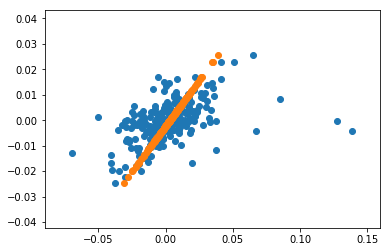

In [37]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

%matplotlib inline

y_predict = model.predict(sm.add_constant(log_return_spy), transform=False)


plt.scatter(log_return_hpq,log_return_spy)
plt.scatter(y_predict,log_return_spy)

